In [99]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [100]:
# Fetch historical stock prices using yfinance
def fetch_stock_prices(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Calculate the Snell envelope for an optimal stopping problem
def snell_envelope(stock_prices):
    snell_values = np.zeros_like(stock_prices)
    max_stock_price = 0

    for i in range(len(stock_prices) - 1, -1, -1):
        max_stock_price = max(max_stock_price, stock_prices[i])
        snell_values[i] = max_stock_price

    return snell_values

# Example usage
ticker = 'AAPL'
start_date = '2023-12-31'
end_date = '2024-01-31'

# Fetch stock prices
stock_prices= fetch_stock_prices(ticker, start_date, end_date)

# Calculate the Snell envelope
snell_values = snell_envelope(stock_prices)

[*********************100%%**********************]  1 of 1 completed


In [101]:
stock_prices

Date
2024-01-02    185.639999
2024-01-03    184.250000
2024-01-04    181.910004
2024-01-05    181.179993
2024-01-08    185.559998
2024-01-09    185.139999
2024-01-10    186.190002
2024-01-11    185.589996
2024-01-12    185.919998
Name: Adj Close, dtype: float64

In [102]:
snell_values

array([186.19000244, 186.19000244, 186.19000244, 186.19000244,
       186.19000244, 186.19000244, 186.19000244, 185.91999817,
       185.91999817])

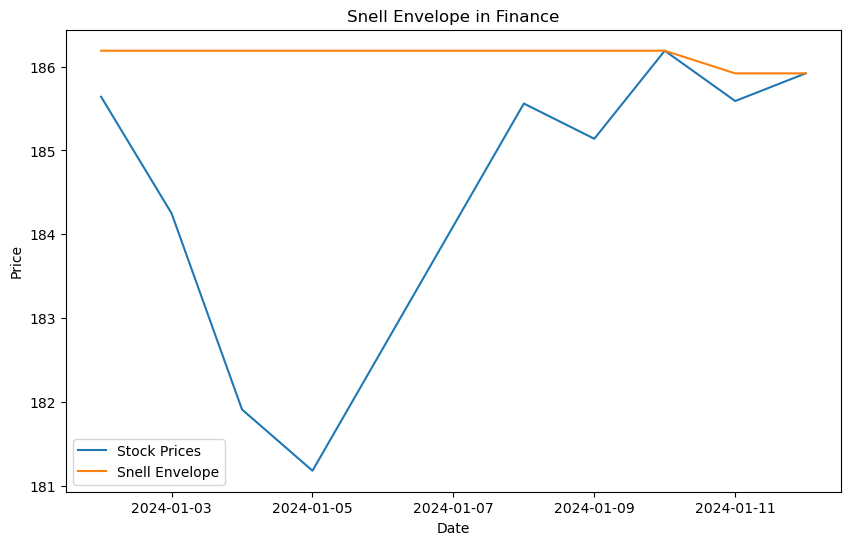

In [103]:
# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(stock_prices.index, stock_prices, label='Stock Prices')
plt.plot(stock_prices.index, snell_values, label='Snell Envelope')
plt.title('Snell Envelope in Finance')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [68]:
stock_prices.std() / 100

0.018138439944188334